# Procesamiento de datos
Fecha: 23 Marzo 2022<br>
Clase: 5

## Indice
1. Outliers (Valores atípicos) <br>
1.1 Ejemplos de datos uni y multivariados. <br>
1.2 Tipos de outliers. Causas tipicas. <br>
2. Deteccion de outliers en datos univariados. <br>
2.1. Método de la desviación standard. Unidades tipificadas (z-scores). Robust z-score. <br>
2.2. Método del rango intercuartílico. <br>
3. Deteccion de outliers en datos multivariados. <br>
3.1. Detección de outliers en clusters con k-means. <br>
3.2. Detección de outliers en datos altamente correlacionados. <br>
4. Tratamiento de outliers. <br>
5. Conclusión y comentarios.


Antes de empezar, importamos los paquetes que vamos a utilizar:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Outliers


Un outlier o **valor atípico es una observación que se desvía mucho de otras observaciones** y despierta sospechas de ser generada por un mecanismo diferente. Su presencia **tiene efectos de distorsión en valores como la media**, varianza o correlaciones entre variables.

Repasemos algunos ejemplos de outliers en datos univariados y multivariados y el efecto que pueden tener.

**Ejemplo:** Efecto sobre la media de outliers en datos univariados.

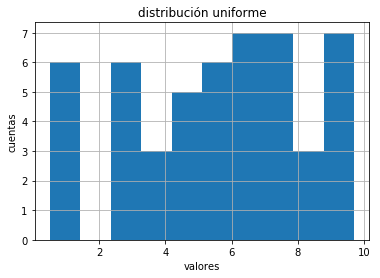

La media de los valores es: 5.5760288574


In [4]:
#ejemplo univariable (outliers en datos univariados)

# Creamos un set de valores como una distribución uniforme
valores = np.random.uniform(0,10,50)

plt.hist(valores)
plt.grid()
plt.xlabel('valores')
plt.ylabel('cuentas')
plt.title('distribución uniforme')
plt.show()

print('La media de los valores es: ' + str(np.mean(valores)))

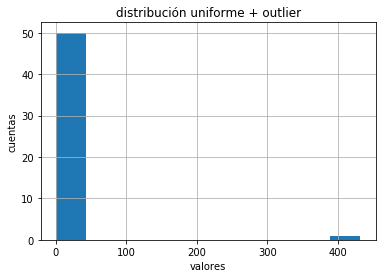

Ahora no vemos bien por que al agregarel outlier y no especificar el tamano de los bins solo se ven dos cajas


In [5]:
#Ahora agrego un valor muy desviado de lo que veniamos viendo:
valores_new = np.append(valores, 432)

plt.hist(valores_new)
plt.grid()
plt.xlabel('valores')
plt.ylabel('cuentas')
plt.title('distribución uniforme + outlier')
plt.show()
plt.show()

print('Ahora no vemos bien por que al agregarel outlier y no especificar el tamano de los bins solo se ven dos cajas')

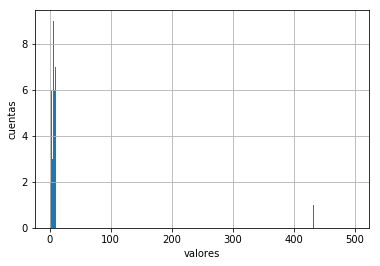

La media de los valores  con outlier es: 13.9372831935
Este valor sale por encima del rango original, luego no es representativo de la muestra inicial


In [6]:
# Para visualizar las cajas con el mismo tamano que antes, podemos especificarlo:
cajitas = np.arange(0,500,1)
plt.hist(valores_new, bins = cajitas)

plt.grid()
plt.xlabel('valores')
plt.ylabel('cuentas')
plt.show()
plt.show()

print('La media de los valores  con outlier es: ' + str(np.mean(valores_new)))
print('Este valor sale por encima del rango original, luego no es representativo de la muestra inicial')


**Pregunta: ** Recordais que medida de tendencia central es mas robusta frente a valores extremos que la media?

In [7]:
np.median(valores_new)

5.6775431390662758

**Ejemplo:** Efecto de outliers en datos multivariados. Efecto en la correlación lineal.

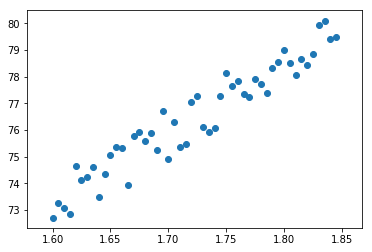

In [11]:
variable_x = np.arange(1.6, 1.85, 0.005)
ruido = np.random.uniform(-1,1,50)
variable_y = 30 + 27 * variable_x + ruido


plt.scatter(variable_x, variable_y)
plt.show()

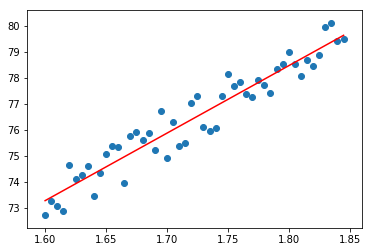

Correlation coefficient: 0.914733444832


In [14]:
# Regresión lineal con scikit-learn

variable_x = variable_x.reshape(-1, 1)
variable_y = variable_y.reshape(-1, 1)

reg = LinearRegression().fit(variable_x, variable_y)

plt.plot(variable_x, reg.predict(variable_x), color = 'red')
plt.scatter(variable_x, variable_y)
plt.show()

print('Correlation coefficient: ' + str(reg.score(variable_x, variable_y)))

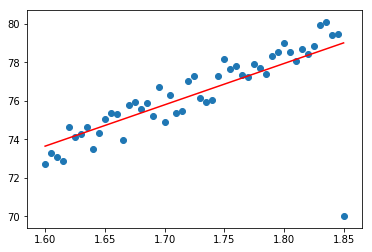

Correlation coefficient: 0.54989079269


In [16]:
variable_x_new = np.append(variable_x, 1.85).reshape(-1, 1)
variable_y_new = np.append(variable_y, 70).reshape(-1, 1)

reg = LinearRegression().fit(variable_x_new, variable_y_new)

plt.plot(variable_x_new, reg.predict(variable_x_new), color = 'red')
plt.scatter(variable_x_new, variable_y_new)
plt.show()

print('Correlation coefficient: ' + str(reg.score(variable_x_new, variable_y_new)))


Mas ejemplos podemos encontrar en esta web:
https://courses.lumenlearning.com/odessa-introstats1-1/chapter/types-of-outliers-in-linear-regression/



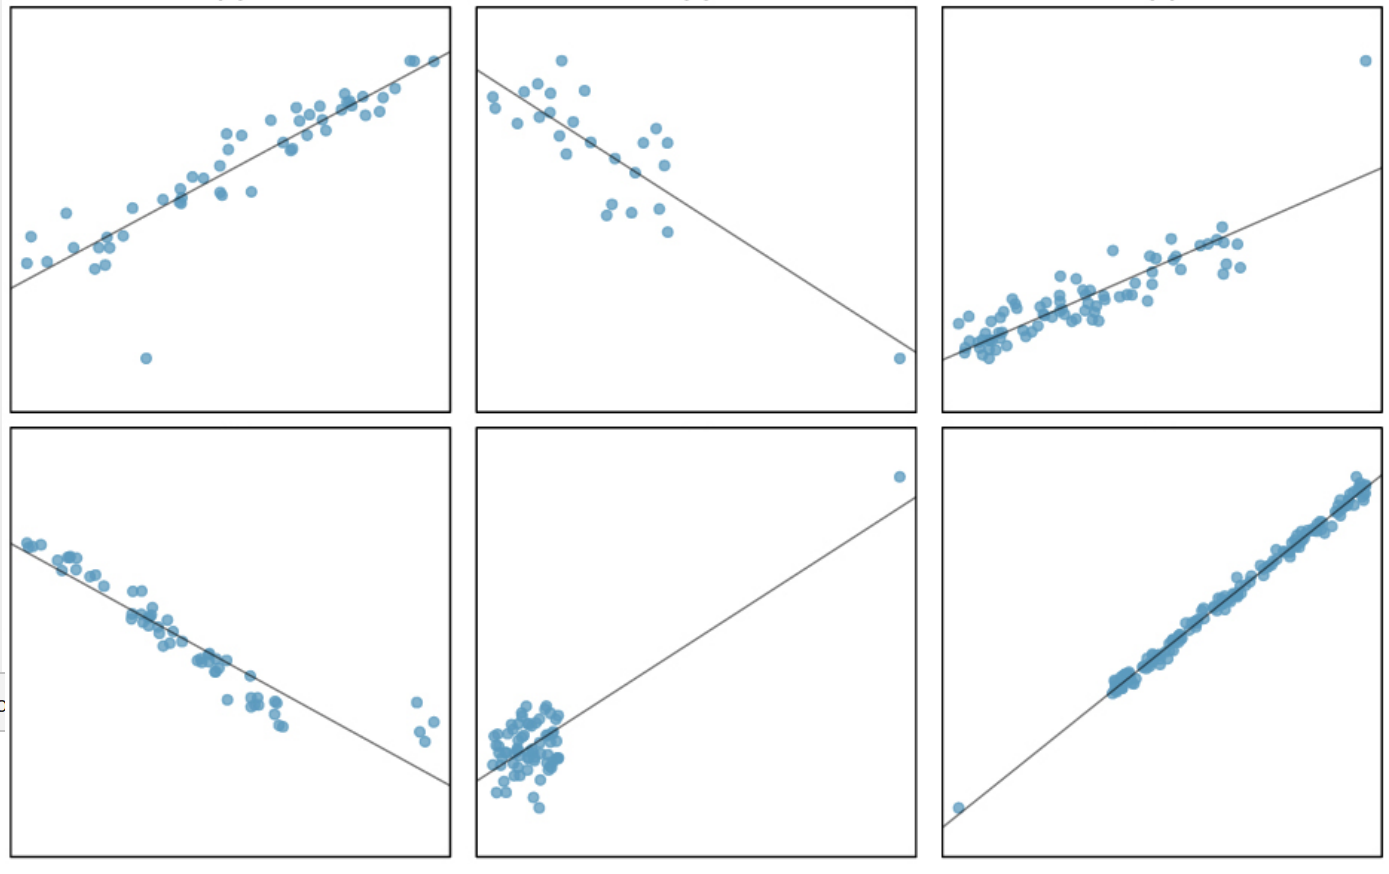

### Tipos de outliers
    
Debido a su naturaleza, los outliers pueden ser de diversos tipos

- Outliers puntuales: Datos que se encuentran lejos del resto de la distribución.
- Outliers contextuales: Por ejemplo encontrar texto en una variable numérica.
- Outliers colectivos: Subconjuntos de novedades en los datos. Esto podría significar una señal que puede indicar el descubrimiento de un nuevo fenómeno.


### Causas típicas:

Las causas más comunes de la aparición de outliers son
- Errores de introducción de datos, normalmente errores humanos.
- Errores instrumentales que afectan a la medición de datos (instrumento defectuoso).

- Errores experimentales de planificación y/o ejecución

- Errores de procesamiento de datos, manipulación de datos y aparición de mutaciones no intencionadas
- Errores de muestreo, al extraer o mezclar conjunto de datos de fuentes erróneas o fuentes múltiples
- Errores naturales o novedades en los datos que no se habían detectado hasta ahora


## Detección de outliers

Aunque la detección de outliers forma parte de la Estadística Descriptiva, algunos métodos pueden requerir técnicas analíticas y gráficos mas sofisticados. Vamos a ver los métodos mas sencillos.

Primero generamos un set de valores como ejemplo.

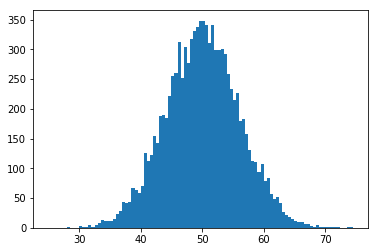

Media = 50.059 std = 5.993


In [18]:
# seed the random number generator
np.random.seed(1)

# generate univariate observations
valores = 6 * np.random.randn(10000) + 50

# Veamos el histograma
cuentas0, cajas0, ignored = plt.hist(valores, bins = np.arange(25,75,0.5))
plt.show()

# Media y desviación estandard:
print('Media = %.3f std = %.3f' % (np.mean(valores), np.std(valores)))


### Método de la desviación standard y de unidades tipificadas (z-scores)

Si sabemos que nuestra distribución de valores es Gaussiana o parecida, podemos usar la desviación standard de la muestra como límite para identificar valores atípicos.

La distribución gaussiana tiene la propiedad de que su desviación standard de la media puede ser usada para resumir el porcentaje de valores en la muestra. Por ejemplo, en el rango de una desviación standard de la muestra, es decir, en el rango $\mu - \sigma$ a $\mu + \sigma$ encontramos el 68% de la muestra. En resumen

- 1 Standard Deviation from the Mean: 68%
- 2 Standard Deviations from the Mean: 95%
- 3 Standard Deviations from the Mean: 99.7%

Vamos a comprobar esto con nuestra distribución de ejemplo.

**Ejercicio:** Comprueba que el 68% de los valores están dentro del rango $(\mu - \sigma)$ - $(\mu + \sigma)$.

In [19]:
mean = np.mean(valores)
std = np.std(valores)
valores[(valores > mean - std) & (valores < mean + std)].shape[0] / valores.shape[0]

0.6849

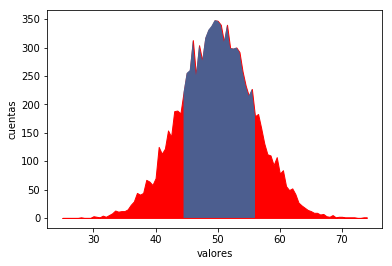

El porcentaje de valores en el rango dado es del: 68.49%
Esto quiere decir que el 68.49% de los valores de la muestra estan entre 44.0659208781 y 56.0513510023


In [20]:
# 1-sigma
limite_inferior = np.mean(valores) - np.std(valores)
limite_superior = np.mean(valores) + np.std(valores)

condicion = np.logical_and(valores > limite_inferior, valores < limite_superior)


porcentaje = 100 * np.sum(condicion) / len(valores)

# visualizacion
#plt.hist(valores, bins = np.arange(25,75,0.5))
plt.fill_between(cajas0[:-1], cuentas0,0, color = 'red')
#plt.hist(valores, bins = np.arange(25,75,0.5))
plt.fill_between(cajas0[:-1], cuentas0, 0,
                where = (cajas0[:-1] > limite_inferior) & (cajas0[:-1] <= limite_superior),
                 alpha=0.8)
plt.xlabel('valores')
plt.ylabel('cuentas')
plt.show()

print('El porcentaje de valores en el rango dado es del: ' + str(porcentaje) + '%')

print('Esto quiere decir que el ' + str(porcentaje) + '% de los valores de la muestra estan entre ' 
      + str(limite_inferior) + ' y '+ str(limite_superior))

**Ejercicio:** Que porcentaje de los valores están dentro del rango $(\mu - 2\sigma)$ - $(\mu + 2\sigma)$?. Y del rango $(\mu - 3\sigma)$ - $(\mu + 3\sigma)$?

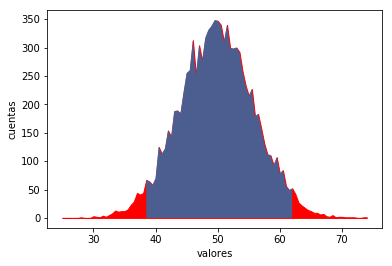

El porcentaje de valores en el rango de 2-sigma es del: 95.32%
Esto quiere decir que el 95.32% de los valores de la muestra estan entre 38.0732058159 y 62.0440660645


In [21]:
# 2-sigma
limite_inferior = np.mean(valores) - 2 * np.std(valores)
limite_superior = np.mean(valores) + 2 * np.std(valores)

condicion = np.logical_and(valores > limite_inferior, valores < limite_superior)

porcentaje = 100 * np.sum(condicion) / len(valores)

# visualizacion
#plt.plot(cajas0[:-1], cuentas0)
plt.fill_between(cajas0[:-1], cuentas0,0, color = 'red')
#plt.hist(valores, bins = np.arange(25,75,0.5))
plt.fill_between(cajas0[:-1], cuentas0, 0,
                where = (cajas0[:-1] > limite_inferior) & (cajas0[:-1] <= limite_superior),
                 alpha=0.8)
plt.xlabel('valores')
plt.ylabel('cuentas')
plt.show()

print('El porcentaje de valores en el rango de 2-sigma es del: ' + str(porcentaje) + '%')

print('Esto quiere decir que el ' + str(porcentaje) + '% de los valores de la muestra estan entre ' 
      + str(limite_inferior) + ' y '+ str(limite_superior))

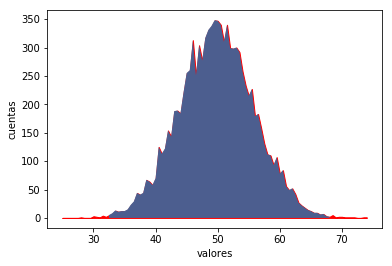

El porcentaje de valores en el rango de 3-sigma es del: 99.71%
Esto quiere decir que el 99.71% de los valores de la muestra estan entre 32.0804907538 y 68.0367811266


In [22]:
# 3-sigma
limite_inferior = np.mean(valores) - 3 * np.std(valores)
limite_superior = np.mean(valores) + 3 * np.std(valores)

condicion = np.logical_and(valores > limite_inferior, valores < limite_superior)

porcentaje = 100 * np.sum(condicion) / len(valores)


# visualizacion
#plt.plot(cajas0[:-1], cuentas0)
plt.fill_between(cajas0[:-1], cuentas0,0, color = 'red')
#plt.hist(valores, bins = np.arange(25,75,0.5))
plt.fill_between(cajas0[:-1], cuentas0, 0,
                where = (cajas0[:-1] > limite_inferior) & (cajas0[:-1] <= limite_superior),
                 alpha=0.8)
plt.xlabel('valores')
plt.ylabel('cuentas')
plt.show()

print('El porcentaje de valores en el rango de 3-sigma es del: ' + str(porcentaje) + '%')
print('Esto quiere decir que el ' + str(porcentaje) + '% de los valores de la muestra estan entre ' 
      + str(limite_inferior) + ' y '+ str(limite_superior))

En la práctica, tres desviaciones standard de la media es un límite común a la hora de identificar outliers. Para muestras pequenas, quizá se puede usar un valor de 2 desviaciones standard (95%), y para muestras grandes, quizá un valor de 4 desviaciones standard.

**Ejercicio:** Identifica los outliers para el límite de sigma 3. Cuantos y cuales son?

In [34]:
# Ricardo
media = np.mean(valores)
std = np.std(valores)
lim_sup = media + 3*std
lim_inf = media - 3*std
valores[(valores <= lim_inf) | (valores >= lim_sup)]#.shape

array([ 68.18514267,  73.75161622,  69.92647254,  31.67741372,
        31.0798553 ,  31.90380809,  70.59598059,  31.61515186,
        72.44149342,  68.81028404,  69.43005918,  30.48179459,
        68.79217837,  68.07652741,  30.85630192,  30.43630943,
        70.42581365,  68.71087754,  69.79124314,  68.89390415,
        30.23084956,  31.66620056,  74.16109427,  30.68520737,
        68.67135099,  71.67966204,  70.38869394,  71.36523992,  28.0613594 ])

In [30]:
#[20:04] DANIEL RIVEROS GARCIA (Invitado)
media = mean
desviacion = std
rango_inf = media-desviacion*3
rango_sup = media+desviacion*3
outliers = valores[(valores <= rango_inf) | (valores >= rango_sup)].shape[0]

outliers



29

In [32]:
# identificacion de outliers
outliers = [x for x in valores if x < limite_inferior or x > limite_superior]
print('tenemos ' + str(len(outliers)) + ' outliers y sus valores son: ')
print(outliers)

tenemos 29 outliers y sus valores son: 
[68.185142674232182, 73.751616224227774, 69.926472537022192, 31.677413717442171, 31.079855298853708, 31.90380808874421, 70.595980590773351, 31.615151863369395, 72.441493422227538, 68.810284040527449, 69.430059180514263, 30.481794590140286, 68.792178368843025, 68.076527409423392, 30.856301919055518, 30.436309425340767, 70.425813654493822, 68.710877544695308, 69.79124313968471, 68.89390415131777, 30.230849559808913, 31.666200557514159, 74.16109426728427, 30.68520736625695, 68.67135098610035, 71.67966204249889, 70.388693939014559, 71.365239924233293, 28.061359404471229]


### Método del valor z ó unidad tipificada
Una forma práctica de aplicar esto para la detección de outliers es haciendo uso del z-score (valor z o unidad tipificada). El valor z de un elemento de una distribución normal viene definido como

<h1><center>  $ Z = \frac{x_i - \mu}{\sigma} $ </center></h1>

Es decir, dadas la media y la desviación estandard de una distribución, **el valor Z de un elemento nos dice como de lejos de la media esta un valor en unidades de std**. A partir de aquí es sencillo detectar como outlier todos los valores Z que esten por encima de un número de desviaciones estandard dadas (un límite típico es $3\sigma$).



We can calculate the mean and standard deviation of a given sample, then calculate the cut-off for identifying outliers as more than 3 standard deviations from the mean.

**Ejercicio:** Identifica los outliers haciendo uso del método z-score. Para ello, <br>
i) Calcula los valores z de los valores de ejemplo anteriores. <br>
ii) Calcula el valor absoluto de los valores z. <br>
iii) Selecciona como outliers todos los valores cuyo z-score este por encima de un límite de 3 sigmas. Cuantos son y que valores tienen?

In [36]:
z_scores = (valores - np.mean(valores)) / np.std(valores)
z_scores_abs = np.abs(z_scores)

condicion = z_scores_abs > 3

print('Tenemos ' + str(np.sum(condicion)) + ' outliers')

print(valores[condicion])

Tenemos 29 outliers
[ 68.18514267  73.75161622  69.92647254  31.67741372  31.0798553
  31.90380809  70.59598059  31.61515186  72.44149342  68.81028404
  69.43005918  30.48179459  68.79217837  68.07652741  30.85630192
  30.43630943  70.42581365  68.71087754  69.79124314  68.89390415
  30.23084956  31.66620056  74.16109427  30.68520737  68.67135099
  71.67966204  70.38869394  71.36523992  28.0613594 ]


In [35]:
mean = np.mean(valores)
std = np.std(valores)
z_scores = (valores - mean) / std
z_scores_abs = np.abs(z_scores)
outliers = z_scores_abs[z_scores_abs > 3]
print('Hay', outliers.shape[0], 'outliers')
outliers

Hay 29 outliers


array([ 3.02475698,  3.95363037,  3.31533143,  3.06726117,  3.16697531,
        3.02948291,  3.42705175,  3.07765076,  3.73501113,  3.12907387,
        3.23249529,  3.26677327,  3.12605259,  3.00663243,  3.2042795 ,
        3.27436334,  3.39865612,  3.11248598,  3.2927658 ,  3.1430275 ,
        3.30864828,  3.0691323 ,  4.02195968,  3.23282992,  3.10589021,
        3.60788489,  3.39246198,  3.5554175 ,  3.67066952])



Sacar el z score se puede ver como una normalizacion o transformacion de variable. Sobre este tema volveremos mas tarde.


### Límite de detección en química analítica.

El valor z esta directamente relacionado con el concepto de límite de detección, muy usado en química analítica. El límite de detección $LoD = \mu + 3 \sigma$ es la senal mas baja que se puede observar con un grado de confianza estadistica suficiente.

Esto es especialmente útil en química analítica, donde el límite de detección es la cantidad mas baja de una substancia que se puede distinguir de su ausencia con cierto grado de confianza (generalmente el 99%). Mientras el límite de cuantificación es $LoQ = \mu + 3 \sigma$, el límite de cuantificación se calcula como $LoD = \mu + 10 \sigma$.


### Método de valor z robusto

Los outliers o valores atípicos tienen una fuerte influencia a la hora de calcular la media y la desviación típica. Es por esto que puede ser útil hacer uso de parámetros robustos, como la mediana y la MAD. El valor Z robusto se puede calcular de forma análoga al valor z,

<h1><center>  $ Z_{robusto} = 0.6745 \frac{x - Mediana}{MAD} $ </center></h1>

donde 

<h1><center>  $ MAD = median(|x-Mediana|)$ </center></h1>

y |…| representa valor absoluto. El factor 0.6745 corresponde al cuartil 0.75 de la distribución normal, al cual converge la MAD.

wikipedia: https://en.wikipedia.org/wiki/Median_absolute_deviation

**Ejercicio:** Identifica los outliers haciendo uso de la versión robusta del método z-score. Para ello, <br>
i) Calcula los valores robustos z de los valores de ejemplo anteriores. <br>
ii) Calcula el valor absoluto de los valores z. <br>
iii) Selecciona como outliers todos los valores cuyo z-score robusto este por encima de un límite de 3. Cuantos son y que valores tienen?

In [37]:
MAD = np.median(np.abs(valores - np.median(valores)))
z_robusto = (0.6745 * (valores - np.median(valores))) / MAD

z_robusto = np.abs(z_robusto)



condicion = z_robusto > 3



print('Tenemos ' + str(np.sum(condicion)) + ' outliers')



print(valores[condicion])

Tenemos 30 outliers
[ 68.18514267  73.75161622  69.92647254  31.67741372  31.0798553
  31.90380809  70.59598059  31.61515186  72.44149342  68.81028404
  69.43005918  30.48179459  68.79217837  68.07652741  32.09098318
  30.85630192  30.43630943  70.42581365  68.71087754  69.79124314
  68.89390415  30.23084956  31.66620056  74.16109427  30.68520737
  68.67135099  71.67966204  70.38869394  71.36523992  28.0613594 ]


### Método del rango intercuartil

No todos los datos tienen una distribución normal o lo suficientemente normal como para tratarlos como extraídos de una distribución gaussiana.

El rango intercuartílico (IQR) es una buena medida para resumir una muestra de datos de distribución no gaussiana.

Como vimos en clases anteriores, el IQR se calcula como la diferencia entre los percentiles 75 y 25 de los datos y define la caja en un diagrama de caja y bigotes.

El IQR se puede utilizar para identificar valores atípicos definiendo límites en los valores de la muestra que son un factor dado F del IQR por debajo del percentil 25 o por encima del percentil 75. Normalmente, por defecto, se usa un valor de 1.5 para el factor F. F = 3 se puede usar para identificar valores atípicos extremos o "alejados".

Veamos un ejemplo con los datos de los ejercicios anteriores.<br>
**Ejercicio:** Calcula los outliers de los valores anteriores con el método del rango intercuartílico.

In [40]:
q1 = np.percentile(valores, 25)
q3 = np.percentile(valores, 75)
IQR = q3 - q1
F = 1.5
outliers = valores[(valores < q1 - F*IQR) | (valores > q3 + F*IQR)]
print('Hay', outliers.shape, 'outliers')
outliers


Hay (81,) outliers


array([ 33.24149   ,  68.18514267,  33.30479319,  73.75161622,
        33.25402156,  69.92647254,  33.80982955,  31.67741372,
        67.50385258,  66.96379876,  66.27169924,  31.0798553 ,
        31.90380809,  70.59598059,  33.25133577,  67.06363142,
        31.61515186,  72.44149342,  66.37677281,  67.36631715,
        68.81028404,  69.43005918,  33.93895174,  33.56514957,
        32.7676985 ,  33.73763756,  66.72416869,  66.23674953,
        67.36155531,  66.45293127,  67.08669271,  66.66231796,
        33.1906267 ,  66.91452257,  30.48179459,  33.88925082,
        66.30431746,  33.68037145,  32.5130065 ,  67.12654449,
        66.38507187,  68.79217837,  68.07652741,  66.93073328,
        32.93037444,  32.09098318,  30.85630192,  30.43630943,
        33.8064861 ,  32.89358274,  33.74996411,  32.44816978,
        70.42581365,  67.85473573,  33.73689873,  67.34484907,
        68.71087754,  69.79124314,  68.89390415,  33.18720774,
        33.92093151,  67.56100022,  33.66093564,  30.23

In [42]:
p25 = np.percentile(valores,25)

p75 = np.percentile(valores,75)

iqr = p75 - p25

rInf = p25 - iqr*1.5

rSup = p75 + iqr*1.5



outliers = valores[(valores < rInf) | (valores > rSup)]



outliers

array([ 33.24149   ,  68.18514267,  33.30479319,  73.75161622,
        33.25402156,  69.92647254,  33.80982955,  31.67741372,
        67.50385258,  66.96379876,  66.27169924,  31.0798553 ,
        31.90380809,  70.59598059,  33.25133577,  67.06363142,
        31.61515186,  72.44149342,  66.37677281,  67.36631715,
        68.81028404,  69.43005918,  33.93895174,  33.56514957,
        32.7676985 ,  33.73763756,  66.72416869,  66.23674953,
        67.36155531,  66.45293127,  67.08669271,  66.66231796,
        33.1906267 ,  66.91452257,  30.48179459,  33.88925082,
        66.30431746,  33.68037145,  32.5130065 ,  67.12654449,
        66.38507187,  68.79217837,  68.07652741,  66.93073328,
        32.93037444,  32.09098318,  30.85630192,  30.43630943,
        33.8064861 ,  32.89358274,  33.74996411,  32.44816978,
        70.42581365,  67.85473573,  33.73689873,  67.34484907,
        68.71087754,  69.79124314,  68.89390415,  33.18720774,
        33.92093151,  67.56100022,  33.66093564,  30.23

In [43]:

iqr = np.percentile(valores, 75) - np.percentile(valores, 25)
lim_inf = np.percentile(valores, 25) - 1.5*iqr
lim_sup = np.percentile(valores, 75) + 1.5*iqr

outliers_iqr = [x for x in valores if x < lim_inf or x > lim_sup]

print('tenemos ' + str(len(outliers_iqr)) + ' outliers y sus valores son: ')
print(outliers_iqr)

tenemos 81 outliers y sus valores son: 
[33.241489999120759, 68.185142674232182, 33.304793194082464, 73.751616224227774, 33.254021559836922, 69.926472537022192, 33.80982955000372, 31.677413717442171, 67.503852577238646, 66.963798764357904, 66.271699243370932, 31.079855298853708, 31.90380808874421, 70.595980590773351, 33.251335772469005, 67.06363141843579, 31.615151863369395, 72.441493422227538, 66.376772812670566, 67.366317149761457, 68.810284040527449, 69.430059180514263, 33.938951741915055, 33.565149566217272, 32.767698498276403, 33.737637557195001, 66.724168687703965, 66.236749532783705, 67.361555310973813, 66.452931270093615, 67.086692705112966, 66.662317958864321, 33.190626700846856, 66.914522567335496, 30.481794590140286, 33.889250823930254, 66.304317458811653, 33.680371454257781, 32.513006495857397, 67.126544488699238, 66.385071865561315, 68.792178368843025, 68.076527409423392, 66.930733282191753, 32.93037443590697, 32.090983182374949, 30.856301919055518, 30.436309425340767, 33.


Como vímos en clases anteriores, en el diagrama de cajas, estos límites se dibujan como líneas que salen de la caja. Los valores que quedan fuera de estos valores se dibujan como puntos.

**Ejercicio:** Dibuja el diagrama de cajas de los valores anteriores.

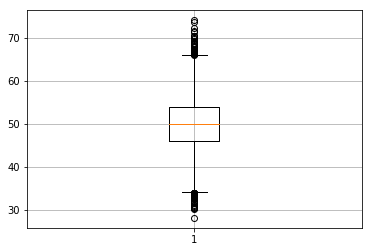

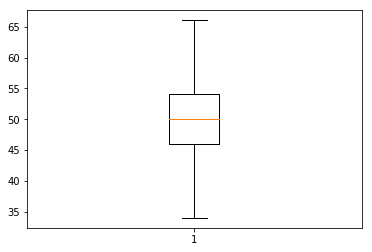

In [45]:
plt.boxplot(valores)
plt.grid()
plt.show()

plt.boxplot(valores, showfliers = False)
plt.show()

### Detección de outliers en varias variables

Dependiendo de las tareas a realizar, puede ser interesante identificar y eliminar outliers en datos multivariados teniendo en cuenta varias variables a la vez.

La opción mas obvia sería usar los métodos anteriores para detectar outliers en cada variable, y después sopesar su unión o su intersección.

**Ejemplo:** Vamos a generar datos en dos dimensiones a partir de dos distribuciones normales y a buscar sus outliers haciendo uso de z-scores.


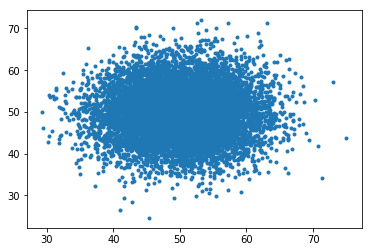

In [46]:

# generamos datos multivariables
valores_x = 6 * np.random.randn(10000) + 50
valores_y = 6 * np.random.randn(10000) + 50

plt.scatter(valores_x, valores_y, marker = '.')
plt.show()


Haciendo uso de z-scores buscamos los outliers para ambas variables. Podemos jugar con el límite de corte que podemos poner y buscar outliers de cada variable que despues podemos unir o intersectar.

Tenemos 26 outliers en la variable x
Tenemos 31 outliers en la variable y


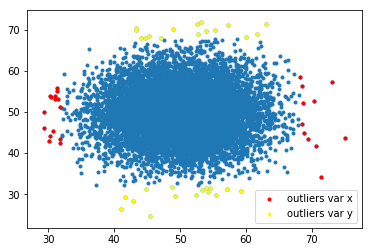

In [49]:

# Outliers en la variable x:
z_scores = (valores_x - np.mean(valores_x)) / np.std(valores_x)
z_scores_abs = np.abs(z_scores)
condicion_x = z_scores_abs > 3
print('Tenemos ' + str(np.sum(condicion_x)) + ' outliers en la variable x')
#print(valores[condicion])

# Outliers en la variable y:
z_scores = (valores_y - np.mean(valores_y)) / np.std(valores_y)
z_scores_abs = np.abs(z_scores)
condicion_y = z_scores_abs > 3
print('Tenemos ' + str(np.sum(condicion_y)) + ' outliers en la variable y')

plt.scatter(valores_x, valores_y, marker = '.')
plt.scatter(valores_x[condicion_x], valores_y[condicion_x], marker = '.', color = 'red', label = 'outliers var x')
plt.scatter(valores_x[condicion_y], valores_y[condicion_y], marker = '.', color = 'yellow', label = 'outliers var y')
plt.legend()
plt.show()

In [48]:
# Cuantos valores estan en intersección?
np.sum(np.logical_and(condicion_x, condicion_y))

1

Como podemos ver, esto sería equivalente a trabajar en coordenadas cartesianas, cuando necesitariamos coordenadas radiales para no perder los outliers de las esquinas. Una opción sería cambiar de métrica. Otra posibilidad sería usar por ejemplo el agoritmo k-means para computar la distancia de cada elemento al centro del cluster y poder aplicar un threshold.

En lo siguiente usaremos KMeans de scikit-learn. Este algoritmo no será discutido en detalle aquí ya que no entra en el temario.

In [50]:
# Cargamos el paquete Kmeans
from sklearn.cluster import KMeans
# Creamos un array con los valores de las dos variables y transponemos la matrix.
X = np.array([valores_x, valores_y]).T
#X.shape
# Hacemos un fit
kmeans = KMeans(n_clusters=1, random_state=0).fit(X)
# En que posición esta el centro del cluster?
print('Posición del centro del cluster' + str(kmeans.cluster_centers_))
# Calculamos las distancia al centro del cluster:
distancias = kmeans.transform(X)


Posición del centro del cluster[[ 50.05661248  49.91237887]]


Podemos plotear las distancias de cada elemento al centro del cluster, para hacernos una idea de que threshold aplicar

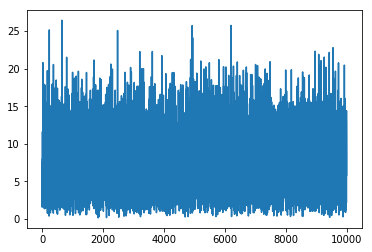

In [51]:
# Ploteamos las distancias de cada elemento al centro del cluster, para hacernos una idea de que threshold aplicar
plt.plot(distancias)
plt.show()

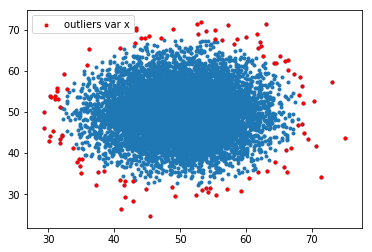

In [54]:
cond_dist = (distancias > 18)[:,0]

plt.scatter(valores_x, valores_y, marker = '.')
plt.scatter(valores_x[cond_dist], valores_y[cond_dist], marker = '.', color = 'red', label = 'outliers var x')
plt.legend()
plt.show()

Proceder así en este caso tiene sentido porque sabemos que nuestra distribución es multivariable gaussiana. Por tanto conocido el centro del cluster, poder usar un radio específico como threshold. Esto se podría hacer también si tuviesemos varios clusters gaussianos. Sin embargo, si la distribución es diferente tendríamos que o bien hacer una transformación de los datos para que fuese parecida a una normal, o bien utilizar otros algoritmos de clustering, como por ejemplo DBSCAN.

Que ocurre si tenemos datos multivariable en una distribución que esperamos conocer? En ese caso es mas sencillo encontrar los outliers. Volvamos al ejemplo inicial: Si queremos limpiar unos datos que sabemos tienen una relación lineal, podemos encontrar los valores que se desvian de esto mirando a su residuo.

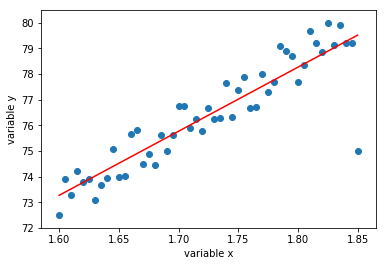

In [55]:
variable_x = np.arange(1.6, 1.85, 0.005)
ruido = np.random.uniform(-1,1,50)
variable_y = 30 + 27 * variable_x + ruido

variable_x_new = np.append(variable_x, 1.85).reshape(-1, 1)
variable_y_new = np.append(variable_y, 75).reshape(-1, 1)

reg = LinearRegression().fit(variable_x_new, variable_y_new)

plt.plot(variable_x_new, reg.predict(variable_x_new), color = 'red')
plt.scatter(variable_x_new, variable_y_new)
plt.xlabel('variable x')
plt.ylabel('variable y')
plt.show()

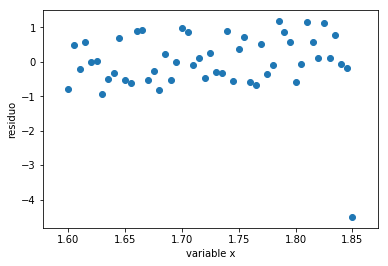

In [56]:
# Calculo del residuo

plt.scatter(variable_x_new, variable_y_new - reg.predict(variable_x_new))
plt.ylabel('residuo')
plt.xlabel('variable x')
plt.show()

## Tratamiento de outliers

Una vez detectados los outliers, tenemos que decidir que hacer con ellos. Hay varias opciones:

1. Mantener los valores atípicos
2. Eliminación
3. Imputación
4. Transformación

En cualquier caso, es importante inspeccionar los valores atípicos encontrados para intentar dilucidar su origen. Con un poco de suerte, podremos obtener información para decidir que hacer con ellos.

### Mantener los valores atípicos
Puede darse el caso de que los valores, aunque atípicos, sean correctos, y a demás sean importantes para la conclusión a la que haya que llegar, por lo tanto se deben mantener.

### Eliminación

Si entendemos que los valores atípicos se deben a un error a la hora de introducirlos en la base de datos o que hay muy pocos con respecto al número total, estos pueden ser eliminados.

Sin embargo, si la presencia de los valores atípicos no se debe a un error, eliminarlos no es la solución, ya que introduce un sesgo.

### Transformación
Transformar todo el conjunto de datos tambien puede dar lugar a la eliminación de outliers, no porque estos se quiten del dataset si no porque ya no se verán como tal. Para esto hay diferentes opciones:

1. Escalado de valores
2. Normalización
3. Transformación logaritmica
4. Transformación de Box-Cox

Esta técnica convierte la distribución en normal. Aunque no da los mejores resultados, no reesulta en pérdida de datos. Veremos esto en mas detalle en otra clase.

### Imputación
Como en el caso de valores faltantes, también podemos imputar outliers. Se puede usar la media, la mediana, el valor cero, etc. Quizá la posibilidad mas interesante sería usar la mediana, ya que no se ve afectada por los outliers.



## Conclusión y comentarios

En esta clase hemos visto el tema de valores atípicos desde el punto de vista del procesado de datos. Nos hemos centrado en identificar y elminar las anomalías porque, posiblemente, esto va a mejorar la métrica de algún modelo que queramos entrenar después.

Sin embargo, otra posibilidad será construir modelos cuya finalidad sea detectar anomalías, ya que nos pueden aportar información, como una máquina a punto de fallar o un cliente cometiendo fraude. En este caso, la detección de outliers es la finalidad misma.
